In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
from preprocessing import *
from dataloader_cm import *

In [4]:
torch.cuda.set_device(4)
PATH = Path('data/cm/')
data_path = Path('data/17/17-18BC/cm')
path_17b_x = path_data / '2017B'
path_17b_x_save = PATH / 'preprocessed' / '2017B'
path_17b_y = path_data / 'B标签'
path_17b_y_save = PATH / 'preprocessed' / 'b-label'

split patchs

In [9]:
path_target = PATH/'preprocessed'/'test'
path_target.mkdir(exist_ok=True)
fns = [str(path_data/'2017B'/'2017B11.png')]
crop_and_save(fns, str(path_target), overlap=0)

overlap_p:  0
n_side:  10
pad:  0


In [18]:
fn_ims = sorted(path_target.iterdir(), key=lambda t: int(t.stem.split('_')[1]))

In [19]:
fn_ims[:3]

[PosixPath('data/preprocessed/test/2017B11_1.png'),
 PosixPath('data/preprocessed/test/2017B11_2.png'),
 PosixPath('data/preprocessed/test/2017B11_3.png')]

In [20]:
ims = [open_image(o, False, norm=True) for o in fn_ims]

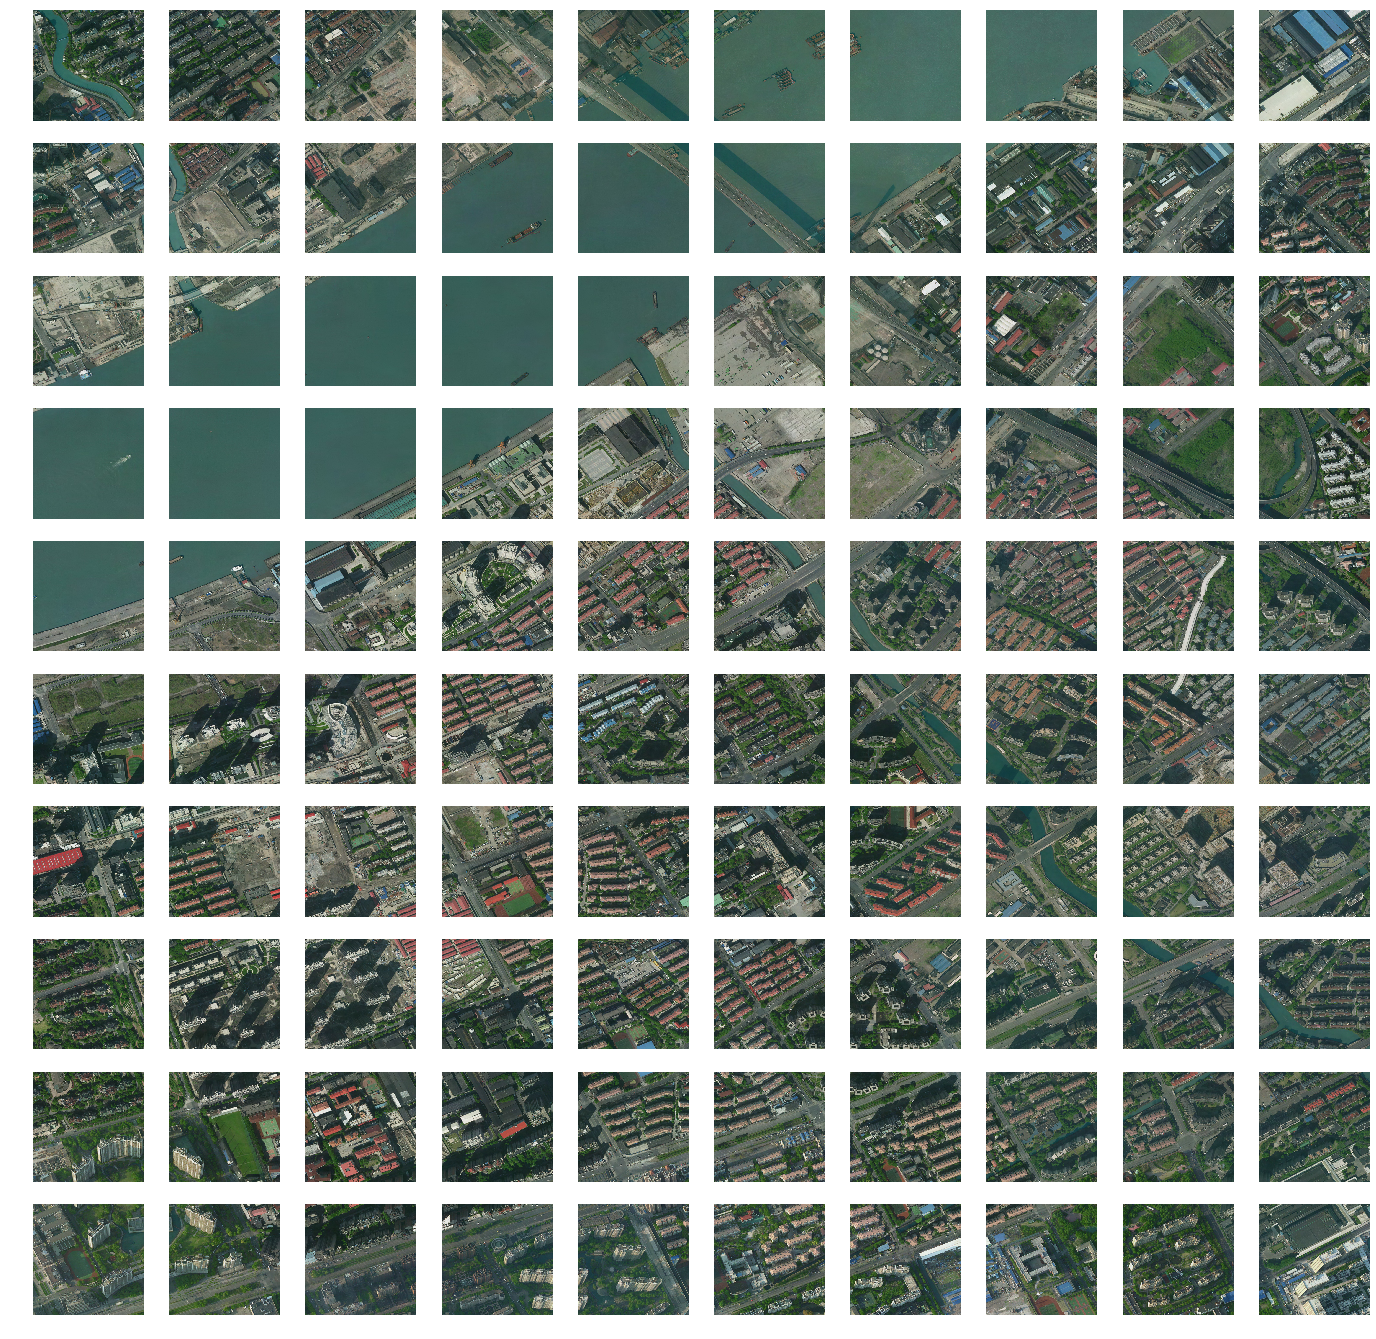

In [22]:
plots(ims, figsize=(24,24), rows=10)

Begin preprocessing

In [6]:
crop_folder(path_17b_x, path_17b_x_save, overlap=0)

overlap_p:  0
n_side:  10
pad:  0
100 patchs saved to data/preprocessed/2017B for img 2017B32.png
100 patchs saved to data/preprocessed/2017B for img 2017B31.png
100 patchs saved to data/preprocessed/2017B for img 2017B14.png
100 patchs saved to data/preprocessed/2017B for img 2017B34.png
100 patchs saved to data/preprocessed/2017B for img 2017B16.png
100 patchs saved to data/preprocessed/2017B for img 2017B26.png
100 patchs saved to data/preprocessed/2017B for img 2017B24.png
100 patchs saved to data/preprocessed/2017B for img 2017B51.png
100 patchs saved to data/preprocessed/2017B for img 2017B43.png
100 patchs saved to data/preprocessed/2017B for img 2017B36.png
100 patchs saved to data/preprocessed/2017B for img 2017B52.png
100 patchs saved to data/preprocessed/2017B for img 2017B45.png
100 patchs saved to data/preprocessed/2017B for img 2017B41.png
100 patchs saved to data/preprocessed/2017B for img 2017B56.png
100 patchs saved to data/preprocessed/2017B for img 2017B11.png
100 pa

In [23]:
crop_folder(path_17b_y, path_17b_y_save, overlap=0)

overlap_p:  0
n_side:  10
pad:  0
100 patchs saved to data/preprocessed/b-label for img B46.png
100 patchs saved to data/preprocessed/b-label for img B11.png
100 patchs saved to data/preprocessed/b-label for img B22.png
100 patchs saved to data/preprocessed/b-label for img B53.png
100 patchs saved to data/preprocessed/b-label for img B24.png
100 patchs saved to data/preprocessed/b-label for img B54.png
100 patchs saved to data/preprocessed/b-label for img B36.png
100 patchs saved to data/preprocessed/b-label for img B52.png
100 patchs saved to data/preprocessed/b-label for img B44.png
100 patchs saved to data/preprocessed/b-label for img B43.png
100 patchs saved to data/preprocessed/b-label for img B41.png
100 patchs saved to data/preprocessed/b-label for img B26.png
100 patchs saved to data/preprocessed/b-label for img B16.png
100 patchs saved to data/preprocessed/b-label for img B21.png
100 patchs saved to data/preprocessed/b-label for img B45.png
100 patchs saved to data/preprocesse

Labels

In [11]:
label1 = open_image(fn_labels[0])

In [20]:
labels = {tuple(pixel) for row in label1 for pixel in row}

In [21]:
labels

{(64.0, 192.0, 0.0),
 (128.0, 64.0, 128.0),
 (128.0, 128.0, 0.0),
 (128.0, 128.0, 128.0),
 (128.0, 128.0, 192.0),
 (192.0, 128.0, 128.0),
 (192.0, 192.0, 128.0),
 (255.0, 255.0, 206.0)}

datasets

In [8]:
fn_x = sorted(path_17b_x_save.glob('*.png'))
fn_y = sorted(path_17b_y_save.glob('*.png'))

In [9]:
trn_x, val_x, trn_y, val_y = train_test_split(fn_x, fn_y, test_size=0.2)
trn, val = (trn_x, trn_y), (val_x, val_y)

In [10]:
from fastai.transforms import *
aug_tfms = transforms_top_down

mean std

In [28]:
from utils.misc import *

In [25]:
fns = [o for o in path_17b_x.glob('*.png') if o.name[0] != '.']

In [30]:
mean, std = calc_mean_std(fns)

Got stats

In [11]:
# stats = (mean, std); stats
stats = np.array(([79.02722, 90.90009, 80.11023], [39.0035 , 34.31987, 35.48108])); stats

array([[79.02722, 90.90009, 80.11023],
       [39.0035 , 34.31987, 35.48108]])

In [12]:
sz = 512
bs = 16

In [13]:
tfms = tfms_from_stats(stats, sz, aug_tfms=aug_tfms, tfm_y=TfmType.PIXEL)
datasets = ImageData.get_ds(Shanghai5120, trn, val, tfms)

In [14]:
md = ImageData(str(PATH), datasets, bs, num_workers=16, classes=None)
denorm = md.trn_ds.denorm

In [15]:
t = iter(md.trn_dl)

In [17]:
%load_ext line_profiler

In [27]:
%prun o = t.__next__()

         45 function calls (43 primitive calls) in 0.158 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        4    0.134    0.033    0.134    0.033 {built-in method numpy.core.multiarray.array}
        2    0.022    0.011    0.022    0.011 {method 'cuda' of 'torch._C._TensorBase' objects}
        1    0.001    0.001    0.158    0.158 dataloader.py:80(__iter__)
        1    0.001    0.001    0.157    0.157 dataloader.py:20(<listcomp>)
        2    0.000    0.000    0.134    0.067 core.py:29(T)
      3/1    0.000    0.000    0.157    0.157 dataloader.py:10(get_tensor)
        1    0.000    0.000    0.158    0.158 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 _base.py:579(result_iterator)
        1    0.000    0.000    0.158    0.158 <string>:1(<module>)
        8    0.000    0.000    0.000    0.000 {built-in method builtins.isinstance}
        2    0.000    0.000    0.022    0.011 core.py:87

In [28]:
o[0].shape

torch.Size([16, 3, 512, 512])

In [29]:
dex = denorm(o[0])

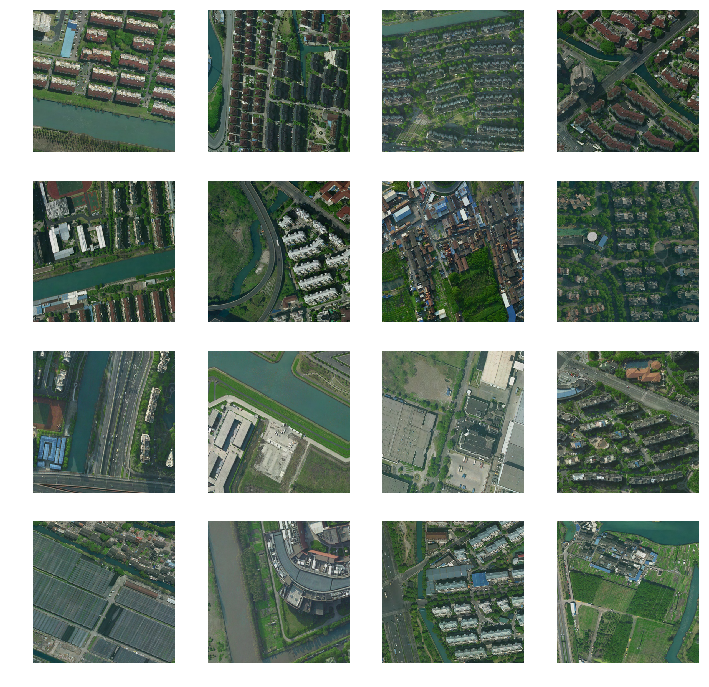

In [31]:
plots(dex, rows=4)

## Putting all together

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from utils.imports import *
PATH = Path('data/17')
path_x_512 = PATH/'preprocessed'/'2017B'
path_y_512 = PATH/'preprocessed'/'B-label'
path_stats = PATH/'preprocessed'/'2017B'/'stats.npy'

sz = 512
test_size = 0.2
gpu_start = 7
world_size = 1
bs = world_size * 19
num_workers = 16 * world_size
# load_model = 'data/models/dlinknet/final.th'

In [6]:
%run train_17 {str(PATH)} {str(path_x_512)} {str(path_y_512)} {str(PATH)} {str(path_stats)}\
    {bs} {sz} {gpu_start} --world_size={world_size}

NameError: name 'get_loader' is not defined

In [4]:
%debug

> /home/ywx/miniconda3/envs/torch/lib/python3.6/site-packages/torch/cuda/__init__.py(261)set_device()
    259             argument is negative.
    260     """
--> 261     if device >= 0:
    262         torch._C._cuda_setDevice(device)
    263 



ipdb>  bs


*** NameError: name 'bs' is not defined


ipdb>  u


> /data/ywx/home/landcover-diff/train_17.py(47)get_learner()
     45     global learner, denorm
     46     _use_clr, _cycle_len, _save_dir = use_clr, cycle_len, save_dir
---> 47     torch.cuda.set_device(gpu_start)
     48     device_ids = range(gpu_start, gpu_start + world_size)
     49 



ipdb>  bs


{'bs'}


ipdb>  sz


{'sz'}


ipdb>  q
